---

## Problem Definition

Analyze the performance of companies in terms of **`Rating`** and **`Work happiness score`**
- Predict the `rating` & `Work Happiness Score`
- Analyze the `importance` of features affecting work happiness score.
- Detect the `anomalies` of ratings.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_pickle('../dataset/data_prepare2.pickle')
def change_obj_cols(se):
    value = se.unique().tolist()
    return se.map(pd.Series(range(len(value)), index = value)).values

df['industry_num'] = change_obj_cols(df['industry'])
df = df.drop(['roles', 'salary'], axis=1)
df.head()

,name,rating,reviews,ceo_approval,ceo_count,employees,industry,revenue,Work/Life Balance,Compensation/Benefits,Job Security/Advancement,Management,Culture,avg_salary,Work Happiness Score,industry_num
1,Georgia Tech,4.2,803,83,275,8,Govt_Services,7,4.0,3.7,3.6,3.7,4.0,36279.933333,76,0
2,Georgetown University,4.1,501,89,181,8,Govt_Services,7,4.1,3.8,3.7,3.7,3.9,45855.000000,70,0
3,Benchmark Hospitality,3.9,167,90,79,8,Leisure,5,3.6,3.7,3.5,3.4,3.8,25590.933333,71,1
4,Support.com,2.7,541,41,233,7,Tech,4,2.8,2.5,2.2,2.5,2.6,22207.466667,45,2
5,Carter Lumber,3.2,271,58,117,7,Real_Estate,7,3.2,3.0,2.6,2.8,3.0,23400.000000,60,3


---

### Scale/Normalise Data 

In [3]:
from sklearn import preprocessing

cols = ['reviews', 'ceo_approval', 'ceo_count', 'employees', 'revenue', 'Work/Life Balance', 'Compensation/Benefits', 
       'Job Security/Advancement', 'Management', 'Culture', 'avg_salary', 'Work Happiness Score', 'industry_num']
df[cols] = df[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,name,rating,reviews,ceo_approval,ceo_count,employees,industry,revenue,Work/Life Balance,Compensation/Benefits,Job Security/Advancement,Management,Culture,avg_salary,Work Happiness Score,industry_num
1,Georgia Tech,4.2,0.003490,0.838384,0.002855,0.875,Govt_Services,0.750,0.750000,0.653846,0.642857,0.655172,0.758621,0.069626,0.714286,0.000000
2,Georgetown University,4.1,0.002089,0.898990,0.001879,0.875,Govt_Services,0.750,0.785714,0.692308,0.678571,0.655172,0.724138,0.103880,0.619048,0.000000
3,Benchmark Hospitality,3.9,0.000538,0.909091,0.000820,0.875,Leisure,0.500,0.607143,0.653846,0.607143,0.551724,0.689655,0.031388,0.634921,0.111111
4,Support.com,2.7,0.002274,0.414141,0.002419,0.750,Tech,0.375,0.321429,0.192308,0.142857,0.241379,0.275862,0.019284,0.222222,0.222222
5,Carter Lumber,3.2,0.001021,0.585859,0.001215,0.750,Real_Estate,0.750,0.464286,0.384615,0.285714,0.344828,0.413793,0.023550,0.460317,0.333333


### Split Dataset into Train & Test
Split the whole dataset into **`train`** and **`test`** datasets with the ratio 8 : 2.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

train, test = train_test_split(df, test_size = 0.2, random_state = 42, shuffle = False)
train.to_excel('../dataset/train.xlsx', index = False)
test.to_excel('../dataset/test.xlsx', index = False)

---

# Machine Learning Models
1. Linear Regression to predict `Work Happiness Score` 
    - Basic Linear Regression 
    - OLS (stepwise) linear regression
    - PCA 
2. Light GBM predicting `rating`

## Basic Linear Regression

In [5]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
# import train/test set
train = pd.read_excel("../dataset/train.xlsx")
test = pd.read_excel("../dataset/test.xlsx")


In [7]:
# split sets into predictor and reponse sets
train_Happiness_X = train.drop(columns = ['name', 'Work Happiness Score','rating','reviews','ceo_count', 'industry_num', 'industry'])
train_Happiness_y = pd.DataFrame(train['Work Happiness Score'])

test_Happiness_X = test.drop(columns = ['name', 'Work Happiness Score','rating','reviews','ceo_count', 'industry_num', 'industry'])
test_Happiness_y = pd.DataFrame(test['Work Happiness Score'])

print("Train Set :", train_Happiness_X.shape, train_Happiness_y.shape)
print("Test Set  :", test_Happiness_X.shape, test_Happiness_y.shape)


Train Set : (2344, 9) (2344, 1)
Test Set  : (587, 9) (587, 1)


In [8]:
def univariateLinearRegression(X_train, X_test, y_train, y_test, disable_print=False):
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    if not disable_print:
    
        # Print the coefficients of the Regression Line
        print('Intercept \t: b = ', linreg.intercept_)
        print('Coefficients \t: a = ', linreg.coef_)
     
        # Check the Goodness of Fit (on Train Data)
        print("Goodness of Fit of Model \tTrain Dataset")
        print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
        print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
        print()

        # Check the Goodness of Fit (on Test Data)
        print("Prediction Accuracy of Model \tTest Dataset")
        print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
        print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
        print()
    
    return linreg.score(X_train, y_train), mean_squared_error(y_train, y_train_pred), linreg.score(X_test, y_test), mean_squared_error(y_test, y_test_pred)

In [9]:
univariateLinearRegression(train_Happiness_X, test_Happiness_X, train_Happiness_y, test_Happiness_y)

Intercept 	: b =  [0.12953474]
Coefficients 	: a =  [[-0.03014075 -0.0282275   0.00179874  0.18348544 -0.04332531 -0.17896783
   0.43979074  0.38915402  0.06705862]]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6078664351319965
Mean Squared Error (MSE) 	: 0.007806840807375346

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6338382327968008
Mean Squared Error (MSE) 	: 0.0073603188217801424



(0.6078664351319965,
 0.007806840807375346,
 0.6338382327968008,
 0.0073603188217801424)

## Stepwise Linear Regression (OLS)

In [10]:
## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score
stepwise_train_happiness_x = train_Happiness_X
stepwise_test_happiness_x = test_Happiness_X
model = sm.OLS(train_Happiness_y, stepwise_train_happiness_x)
results = model.fit()
print(results.summary())

y_test_pred = results.predict(stepwise_test_happiness_x)
print("Prediction Accuracy of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(test_Happiness_y, y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_Happiness_y, y_test_pred))
print()


                                  OLS Regression Results                                 
Dep. Variable:     Work Happiness Score   R-squared (uncentered):                   0.970
Model:                              OLS   Adj. R-squared (uncentered):              0.970
Method:                   Least Squares   F-statistic:                              8310.
Date:                  Sat, 23 Apr 2022   Prob (F-statistic):                        0.00
Time:                          20:18:42   Log-Likelihood:                          2314.1
No. Observations:                  2344   AIC:                                     -4610.
Df Residuals:                      2335   BIC:                                     -4558.
Df Model:                             9                                                  
Covariance Type:              nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
-------

---

## Linear Regression after PCA

In [11]:
dummies = pd.get_dummies(df['industry'])
df = pd.concat([df, dummies], axis=1)
df = df.drop(['industry', 'industry_num'], axis=1)
df.head()

,name,rating,reviews,ceo_approval,ceo_count,employees,revenue,Work/Life Balance,Compensation/Benefits,Job Security/Advancement,...,Commodities,FNB,Financials,Govt_Services,Healthcare_NGO,Leisure,Real_Estate,Retail,Tech,Telecomm
1,Georgia Tech,4.2,0.003490,0.838384,0.002855,0.875,0.750,0.750000,0.653846,0.642857,...,0,0,0,1,0,0,0,0,0,0
2,Georgetown University,4.1,0.002089,0.898990,0.001879,0.875,0.750,0.785714,0.692308,0.678571,...,0,0,0,1,0,0,0,0,0,0
3,Benchmark Hospitality,3.9,0.000538,0.909091,0.000820,0.875,0.500,0.607143,0.653846,0.607143,...,0,0,0,0,0,1,0,0,0,0
4,Support.com,2.7,0.002274,0.414141,0.002419,0.750,0.375,0.321429,0.192308,0.142857,...,0,0,0,0,0,0,0,0,1,0
5,Carter Lumber,3.2,0.001021,0.585859,0.001215,0.750,0.750,0.464286,0.384615,0.285714,...,0,0,0,0,0,0,1,0,0,0


In [12]:
df.columns

Index(['name', 'rating', 'reviews', 'ceo_approval', 'ceo_count', 'employees',
       'revenue', 'Work/Life Balance', 'Compensation/Benefits',
       'Job Security/Advancement', 'Management', 'Culture', 'avg_salary',
       'Work Happiness Score', 'Commodities', 'FNB', 'Financials',
       'Govt_Services', 'Healthcare_NGO', 'Leisure', 'Real_Estate', 'Retail',
       'Tech', 'Telecomm'],
      dtype='object')

In [13]:
from sklearn.decomposition import PCA

rating_features = ['reviews', 'ceo_approval', 'ceo_count', 'employees',
           'revenue', 'Work/Life Balance', 'Compensation/Benefits',
           'Job Security/Advancement', 'Management', 'Culture', 'avg_salary',
           'Work Happiness Score', 'Commodities', 'FNB', 'Financials',
           'Govt_Services', 'Healthcare_NGO', 'Leisure', 'Real_Estate', 'Retail',
           'Tech', 'Telecomm']

def pca_linear_regression(components, features, get_weights=False):
    rating_pca = PCA(n_components=components)

    x = df.loc[:, rating_features].values
    y = df.loc[:,['rating']].values

    pca_columns = ['pc' + str(s) for s in list(range(1, components+1))]

    principalDf = pd.DataFrame(data = rating_pca.fit_transform(x)
                 , columns = pca_columns)

    ratingPCADf = pd.concat([principalDf, df['rating'].reset_index()], axis = 1)
    ratingPCADf.drop(['index'], axis=1)

    train_rating_pca, test_rating_pca = train_test_split(ratingPCADf, test_size = 0.2, random_state = 42, shuffle = False)

    train_rating_pca_x = train_rating_pca[pca_columns]
    train_rating_pca_y = train_rating_pca['rating']

    test_rating_pca_x = test_rating_pca[pca_columns]
    test_rating_pca_y = test_rating_pca['rating']
    
    if get_weights:
        return rating_pca.components_

    return univariateLinearRegression(train_rating_pca_x, test_rating_pca_x, train_rating_pca_y, test_rating_pca_y, disable_print=True)


In [14]:
rSq_test_list = np.array([])
mse_test_list = np.array([])
rSq_train_list = np.array([])
mse_train_list = np.array([])

for i in range(2,10):
    rSq_test, mse_test, rSq_train, mse_train = pca_linear_regression(i, rating_features)
    rSq_test_list = np.append(rSq_test_list, rSq_test)
    mse_test_list = np.append(mse_test_list, mse_test)
    rSq_train_list = np.append(rSq_train_list, rSq_train)
    mse_train_list = np.append(mse_train_list, mse_train)

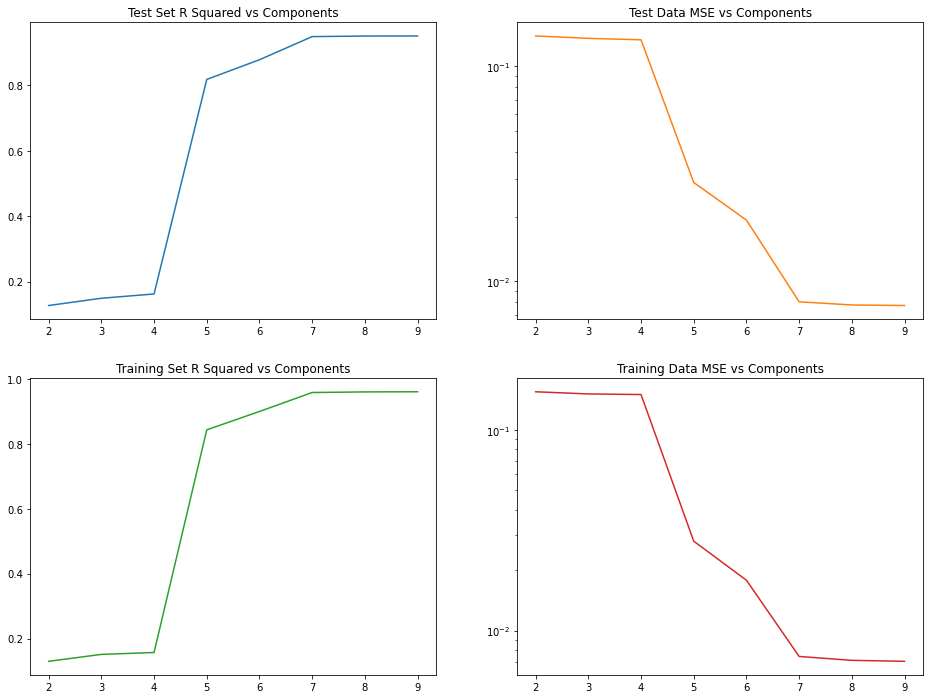

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
x = list(range(2,10))

axs[0, 0].plot(x, rSq_test_list)
axs[0, 0].set_title('Test Set R Squared vs Components')

axs[0, 1].plot(x, mse_test_list, 'tab:orange')
axs[0, 1].set_title('Test Data MSE vs Components')
axs[0, 1].set_yscale('log')

axs[1, 0].plot(x, rSq_train_list, 'tab:green')
axs[1, 0].set_title('Training Set R Squared vs Components')

axs[1, 1].plot(x, mse_train_list, 'tab:red')
axs[1, 1].set_title('Training Data MSE vs Components')
axs[1, 1].set_yscale('log')

Due to the multicollinearity of the features, we were able to reduce the **22** features down to just **7** dimensions without losing much information. This can be seen on the OLS Model MSE, which decreased significantly from 4 dimensions to 7 dimensions before tapering off. 

<AxesSubplot:xlabel='Weights', ylabel='Features'>

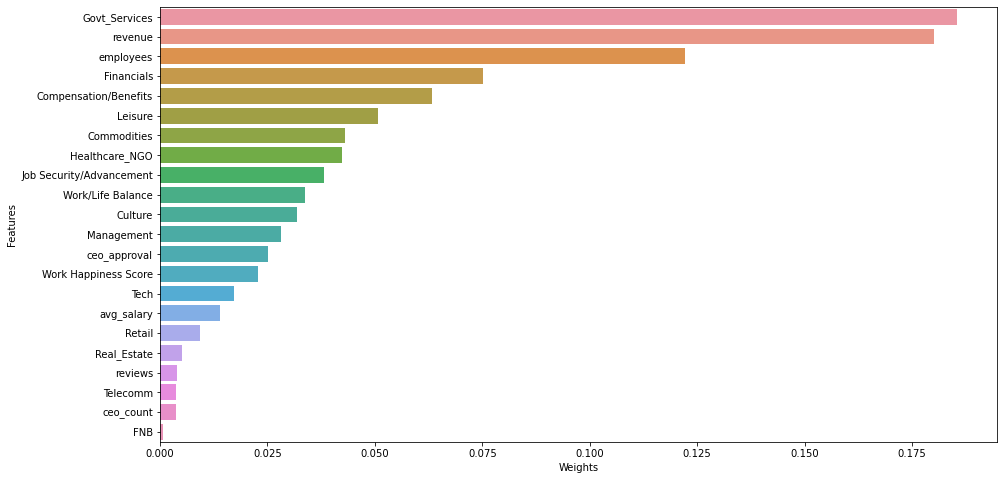

In [16]:
principleComponents = np.array(pca_linear_regression(7, rating_features, get_weights=True))
weights = abs(principleComponents.sum(axis=0))
weights = weights/np.sum(weights)

weightsDF = pd.DataFrame({"Features": rating_features,
                   "Weights": weights})

plt.figure(figsize=(15,8))
sb.barplot(x='Weights', y="Features", data=weightsDF, order=weightsDF.sort_values('Weights', ascending=False).Features, 
           orient='h')

As it turns out, the industries actually played an important role in predicting **work happiness**. The highest weighted was **Governmental Services**, possibly because it was an outlier as discovered in our EDA. 

**Revenue** and **employees** were ranked unexpectedly high however, which possibly indicates that **company size** does affect **work happiness**, or even differences across the various **industries**. 

---

## Light GBM model
Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

In [17]:
from sklearn.model_selection import KFold
import lightgbm as lgb
import datetime
import time

In [18]:
# import train/test set
target = train['rating']
train_rating_X = train.drop(columns = ['name', 'rating', 'reviews', 'ceo_count', 'industry'])
features = [c for c in train_rating_X.columns]
categorical_feats = ['industry_num', 'revenue', 'employees']

In [19]:
# set the hyperparameters of the LGBM model
param = {'num_leavs' : 80,
         'min_data_in_leaf' : 90,
         'objective' : 'regression',
         'max_depth' : 5,
         'learning_rate' : 0.005,
         'boosting' : 'gbdt',
         'feature_fraction' : 0.7522,
         'bagging_freq' : 1,
         'bagging_fraction' : 0.7083,
         'bagging_seed' : 11,
         'metric' : 'rmse',
         'lambda_l1' : 0.2634,
         'random_state' : 133,
         'verbosity' : -1
        }

In [20]:
folds = KFold(n_splits = 6, shuffle = True, random_state = 20)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
important_feature = pd.DataFrame()

for fold_cnt, (train_idx, value_idx) in enumerate(folds.split(train.values, target.values)):
    print("[Fold {}]".format(fold_cnt))
    train_data = lgb.Dataset(train.iloc[train_idx][features], label = target.iloc[train_idx], categorical_feature=categorical_feats)
    value_data = lgb.Dataset(train.iloc[value_idx][features], label = target.iloc[value_idx], categorical_feature=categorical_feats)

    model = lgb.train(param, train_data, 5000, valid_sets = [train_data, value_data], verbose_eval = 1000, early_stopping_rounds = 100)
    
    oof[value_idx] = model.predict(train.iloc[value_idx][features], num_iteration = model.best_iteration)
    
    important_fold = pd.DataFrame()
    important_fold["feature"] = features
    important_fold["importance"] = model.feature_importance()
    important_fold["fold"] = fold_cnt + 1
    important_feature = pd.concat([important_feature, important_fold], axis = 0)
    
    predictions += model.predict(test[features], num_iteration = model.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(mean_squared_error(oof, target)**0.5))

[Fold 0]
[LightGBM] [Warning] Unknown parameter: num_leavs
Training until validation scores don't improve for 100 rounds


/Users/jianglei/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/Users/jianglei/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/jianglei/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1000]	training's rmse: 0.0872178	valid_1's rmse: 0.0825167
[2000]	training's rmse: 0.0838168	valid_1's rmse: 0.0812717
Early stopping, best iteration is:
[2184]	training's rmse: 0.0834137	valid_1's rmse: 0.0811793
[Fold 1]
[LightGBM] [Warning] Unknown parameter: num_leavs
Training until validation scores don't improve for 100 rounds
[1000]	training's rmse: 0.0866741	valid_1's rmse: 0.0872821
[2000]	training's rmse: 0.0831148	valid_1's rmse: 0.085415
Early stopping, best iteration is:
[2165]	training's rmse: 0.0827321	valid_1's rmse: 0.085373
[Fold 2]
[LightGBM] [Warning] Unknown parameter: num_leavs
Training until validation scores don't improve for 100 rounds
[1000]	training's rmse: 0.0855189	valid_1's rmse: 0.0904695
Early stopping, best iteration is:
[1327]	training's rmse: 0.0839391	valid_1's rmse: 0.0903862
[Fold 3]
[LightGBM] [Warning] Unknown parameter: num_leavs
Training until validation scores don't improve for 100 rounds
[1000]	training's rmse: 0.0851935	valid_1's rmse: 0.09

In [21]:
print("Root Mean Squared Error (RMSE) \t: {}".format(mean_squared_error(predictions, test['rating'])**0.5))
print("Mean Absolute Error (MAE) \t: {}".format(mean_absolute_error(predictions, test['rating'])))


Root Mean Squared Error (RMSE) 	: 0.08833591022060604
Mean Absolute Error (MAE) 	: 0.06049259983835943


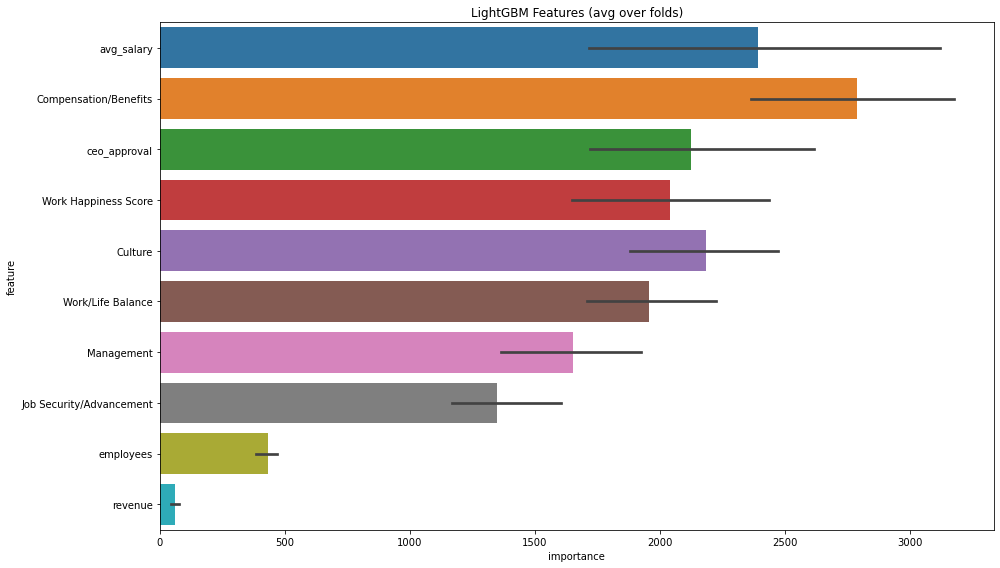

In [22]:
cols = (important_feature[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by = "importance", ascending = False)[0:10].index)

best_features = important_feature.loc[important_feature.feature.isin(cols)]

plt.figure(figsize=(14, 8))
sb.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

---

# Insights

### Find the `anomalies` of ratings among the companies.

In [23]:
df_anomalies = pd.DataFrame({"Company Name" : test["name"].values})
df_anomalies["industry"] = test['industry']
df_anomalies["real"] = test['rating']
df_anomalies["predict"] = predictions
df_anomalies['difference'] = df_anomalies['predict'] - df_anomalies["real"] 

<AxesSubplot:xlabel='difference', ylabel='Count'>

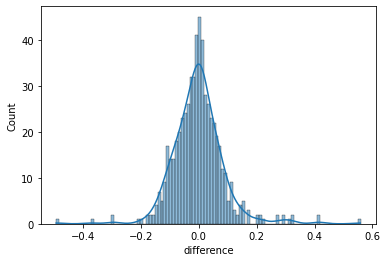

In [24]:
sb.histplot(df_anomalies['difference'], binwidth = 0.01, kde=True)

In [25]:
LL = df_anomalies['difference'].quantile(0.025)
UL = df_anomalies['difference'].quantile(0.975)
print("2.5% percentile of ratios : {}".format(LL))
print("97.5% percentile of ratios : {}".format(UL))
print("The 95% confidential interval is [{}, {}]".format(LL, UL))

2.5% percentile of ratios : -0.14230275845805224
97.5% percentile of ratios : 0.18635468536349467
The 95% confidential interval is [-0.14230275845805224, 0.18635468536349467]


In [26]:
df_anomalies_L = df_anomalies[(df_anomalies['difference'] < LL)]
df_anomalies_L

,Company Name,industry,real,predict,difference
9,"Med-Scribe, Inc",Financials,4.6,4.306333,-0.293667
44,Encore Wire,Commodities,3.4,3.245839,-0.154161
76,Lamps Plus,Retail,3.5,3.206458,-0.293542
124,ServiceLink,Financials,3.0,2.821026,-0.178974
156,Pressley Ridge,Govt_Services,3.3,3.144735,-0.155265
203,Radio Flyer Inc.,Retail,4.8,4.308733,-0.491267
260,Hepaco,Financials,3.3,2.929882,-0.370118
275,"Car Spa, Inc.",Retail,3.4,3.232287,-0.167713
281,Suncrest Hospice Home Health Palliative Care,Healthcare_NGO,4.5,4.306386,-0.193614
348,Televerde,Financials,3.8,3.632783,-0.167217


<AxesSubplot:xlabel='count', ylabel='industry'>

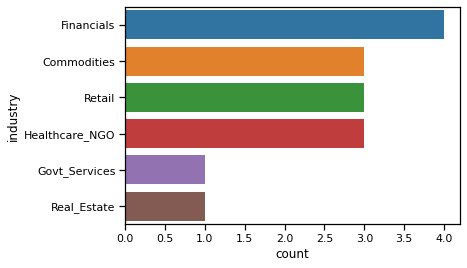

In [27]:
sb.set_context("notebook")
sb.countplot(y='industry', data=df_anomalies_L, order=df_anomalies_L['industry'].value_counts().index)

In [28]:
df_anomalies_U = df_anomalies[(df_anomalies['difference'] > UL)]
df_anomalies_U

,Company Name,industry,real,predict,difference
18,Enlivant,Healthcare_NGO,2.3,2.618753,0.318753
71,Primus Technologies,Govt_Services,3.5,3.775176,0.275176
180,BlueGrace Logistics,Govt_Services,2.8,3.089272,0.289272
181,Country Pure Foods,FNB,2.4,2.604594,0.204594
187,CARVANA,Retail,2.7,2.916871,0.216871
238,Cantex Continuing Care Network,Healthcare_NGO,2.1,2.657591,0.557591
253,1-800 CONTACTS,Retail,3.6,3.809335,0.209335
272,Fuccillo Automotive Group,Retail,3.3,3.576864,0.276864
303,Legend Senior Living,Healthcare_NGO,2.3,2.625608,0.325608
349,Haven Behavioral Healthcare,Healthcare_NGO,2.2,2.613432,0.413432


<AxesSubplot:xlabel='count', ylabel='industry'>

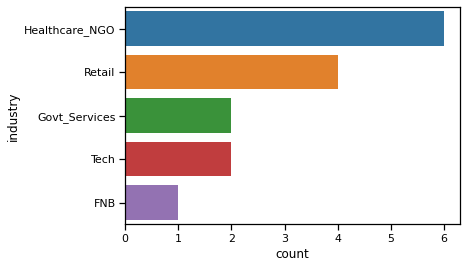

In [29]:
sb.set_context("notebook")
sb.countplot(y='industry', data=df_anomalies_U, order=df_anomalies_U['industry'].value_counts().index)